<head>
    <style>
        .md-typeset h2 {
            margin:0;
            }
        .md-typeset h3 {
            margin:0;
            }
        .jupyter-wrapper table.dataframe tr, .jupyter-wrapper table.dataframe th, .jupyter-wrapper table.dataframe td {
            text-align:left;
            }
        .jupyter-wrapper table.dataframe {
            table-layout: auto;
            }
        .jp-RenderedText pre {
            display: inline-block;
            overflow-x: auto;
            width: max-content;
        }
    </style>
</head>

# COVID-19 vaccines: development and evaluation

In this lecture, we will simulate how COVID-19 vaccines were 'developed and
evaluated' with common statistical methods. In real life, much more work have 
to be done for the vaccine development and evaluation. Neverthelss, we will 
follow the general guidelines (such as [this one](https://covid19vaccinetrial.co.uk/phase-i-trial-explained))
and try to give you the overview of vaccine development and evaluation (the 
the following figure) and how __causal reasoning and statistical methods__ could
play a role in vaccine development and approval stages. 

![overview](https://www.ema.europa.eu/sites/default/files/stanadard_vaccine_development_-_updated_05-2021_v32x_0.png)


## Key assumptions for our simulation


We all know that human being has natural immunity, which is the antibody 
protection your body creates against a germ or virus once you've been infected 
with it. 

In our simulation, we will assume amount of antibody against covid19
in our _population_ follows the Gaussian distribution. Intuitively, the
distribution gives _the frequency of values of a random variable_. In our
case the random variable at this stage is _the amount of antibody_ in a person.
It is a _continuous variable_ and its mean is 20 and standard deviation is 3. 

Now, let's generate value for this variable in `Stata`. Our `sample size` will
be 1000. 

<div class='admonition note'>
<p class='admonition-title'>Note</p>
<p>Every time you see '//' in Stata script, they are comment. Stata
will not execute it</p>
</div>

In [1]:
// just comment, stata will do nothing

In [2]:
// clear Stata
clear  
// set sample size (observation) = 1000
set obs 1000  
// set the random generator seed
set seed 19201
// random normal distribution with mean=20
generate antibody = rnormal(20, 3)




number of observations (_N) was 0, now 1,000




Now a random variable called `antibody` has been generated for 1000 people. Since
this random variable follows the Gaussian distribution (or normal distribution),
some people might have more antibody while others might have less. Now we will
_summarize and visaulize_ how the antibody will be distributed in our sample. 

In [3]:
describe   // describe the dataset we have 


Contains data
  obs:         1,000                          
 vars:             1                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [4]:
summarize antibody


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    antibody |      1,000    20.08761    2.923729   11.54476   30.63326


You can observe:

- obseration = 1000
- mean = 20.08761
- standard deviation = 2.92
- min, max = 11.544, 30.633

In [5]:
// list first 10 observations 
list antibody in f/10


     +----------+
     | antibody |
     |----------|
  1. | 18.25307 |
  2. | 16.46375 |
  3. | 22.61064 |
  4. | 16.88403 |
  5. | 20.63522 |
     |----------|
  6. | 20.68504 |
  7. | 22.81262 |
  8. | 21.36884 |
  9. |  18.1802 |
 10. | 17.53478 |
     +----------+


In [6]:
// list last 10 observations 
list antibody in -10/l


      +----------+
      | antibody |
      |----------|
 991. | 18.41049 |
 992. | 19.78679 |
 993. |  23.2485 |
 994. | 22.26105 |
 995. | 20.59435 |
      |----------|
 996. | 24.75361 |
 997. | 17.14018 |
 998. | 23.63145 |
 999. |   27.327 |
1000. | 18.83713 |
      +----------+


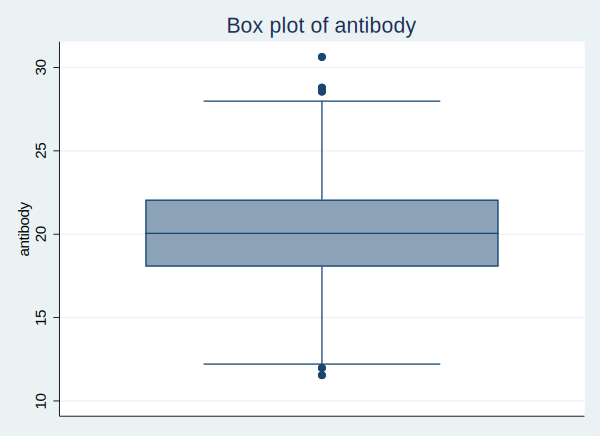

In [7]:
graph box antibody, title("Box plot of antibody")

Please make sure you understand the concept of box plot. If not, just review 
it with the following figure.

![boxplot](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Elements_of_a_boxplot.svg/1200px-Elements_of_a_boxplot.svg.png)

In [8]:
// we can also get the statistical summary
summarize antibody, detail


                          antibody
-------------------------------------------------------------
      Percentiles      Smallest
 1%     13.44618       11.54476
 5%     15.25752       11.97706
10%     16.26203       12.21118       Obs               1,000
25%     18.05436       12.46592       Sum of Wgt.       1,000

50%     20.05177                      Mean           20.08761
                        Largest       Std. Dev.      2.923729
75%     22.07603       28.55541
90%      23.8663       28.71392       Variance       8.548194
95%     24.90666       28.79069       Skewness       .0602794
99%     26.98062       30.63326       Kurtosis       2.922993


(bin=29, start=11.544757, width=.65822407)


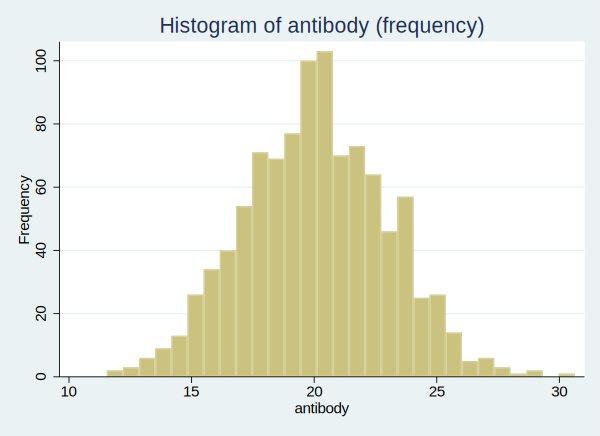

In [9]:
hist antibody, frequency title("Histogram of antibody (frequency)")

<div class="admonition question">
<p class="admonition-title">
Questions
<p>
<ul>
  <li>How likely you could observe a person of having antibody greater than 32 in our sample? </li>
  <li>Could you estimate the mean of our sample from the histogram we plot?</li>
  <li>Is the histogram symmetric or skewed?</li>
</ul>
</div>

## Who can take part in the clinical trails?

We have generated `antibody` for our sample (1000 observations or people). However,
we have not decided _who could take part the clinical trails_? When we develop
the vaccine for Covid-19, we want people who take part the clinical trails 
to be _representative_. For instance, only _women_ or _men_ take part the 
clinical trails, it will not be representative. 

Now, we will generate two new variables:

* age: people who are 18-60 years old can take part the clinical trials
* gender: both men and women should be included in our sample with equal size

### How should we generate `age` values for our sample? 

When we want to generate a new variable, we have to think about what kind of
_reality_ we wane to emulate (match, imitate). For `antibody`, we assumes it 
follows _normal distribution_, that's why it has the bell curve like the following
one. 

![iqbellcurve](https://i.kym-cdn.com/photos/images/facebook/002/031/358/75a.png)

For `age`, we will follow demographic distribution of Germany. The following
graph gives the age distribution of Germany in 2018. 

![agedistribution](https://upload.wikimedia.org/wikipedia/commons/d/d1/Germany_population_pyramid_%282018%29.jpg)

From the above figure, we could see:

* for people who are 18-50 years old, the size of population is similar
* the population has more people who are 50-60 years old
* we will just assume the size of population for 18-60 years old are same

Therefore, we will assume that the population size for 15-60 years old follows
the _uniform_ distribution, which has the following shape. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/1200px-Uniform_Distribution_PDF_SVG.svg.png" alt="uniform" width="500"/>


In [10]:
// generate age between 18 - 60
set seed 19201 
generate age = floor((60-18+1)*runiform() + 18)

In `Stata`, the uniform distribution is called via `runiform`. Since the variable
age has to be __integer__, therefore, we need to use `floor` function to get the
integer. 

In [11]:
display runiform()  // generate a random number from [0, 1]

.45987925


<div class="admonition warning">
<p class="admonition-title">
Warning
<p>
When you run runiform() on your computer, the number will be different as
each number was generatred <b>randomly</b> from [0, 1]. 
</p>
</div>

In [12]:
display runiform() * 10  // 10 times a random number from [0, 1]

.70828883


In [13]:
display (60-18+1)*runiform() + 18  // generate age from 18-60
display floor((60-18+1)*runiform() + 18)  // use floor to get the integer


55.513

25


In [14]:
// now we will list the first 10 observations of age
list antibody age in f/10


     +----------------+
     | antibody   age |
     |----------------|
  1. | 18.25307    58 |
  2. | 16.46375    43 |
  3. | 22.61064    49 |
  4. | 16.88403    40 |
  5. | 20.63522    24 |
     |----------------|
  6. | 20.68504    43 |
  7. | 22.81262    19 |
  8. | 21.36884    53 |
  9. |  18.1802    59 |
 10. | 17.53478    56 |
     +----------------+


In [15]:
// we could distribe our dataset
describe


Contains data
  obs:         1,000                          
 vars:             2                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 
age             float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


Now, we have 2 variables (`antibody` and `age`) and 1000 observations for each
variable. In Stata, one could also `label` the dataset. 

In [16]:
label variable antibody "amount of antibody"
label variable age "value of age"

Once we `label` them, we could see the description when we `describe` the 
dataset again. 

In [17]:
describe


Contains data
  obs:         1,000                          
 vars:             2                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 amount of antibody
age             float   %9.0g                 value of age
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


### Generate variable `gender` for our sample

Now, we will generate `gender` for our dataset. Since computer 'feels' comfortable
for dealing with numbers, we will:

* use number 1 to represent _female_ (or code female as 1)
* use number 0 to represent _male_ (or code male as 0)

We will use `runiform` to generate values for `gender`. We use uniform distribution
becaus it is equally likely to be female or male. 

In [18]:
// generate gender
generate gender = 1 if runiform() >= 0.5

(525 missing values generated)


In [19]:
list gender in f/10


     +--------+
     | gender |
     |--------|
  1. |      . |
  2. |      . |
  3. |      1 |
  4. |      1 |
  5. |      . |
     |--------|
  6. |      1 |
  7. |      . |
  8. |      . |
  9. |      . |
 10. |      1 |
     +--------+


<div class="admonition note">
<p class="admonition-title">
Note
</p>
It is important to know that Stata uses dot (.) to represent the missing values.
</div>

In [20]:
// replace missing values 
replace gender = 0 if missing(gender)

(525 real changes made)


In [21]:
list gender in f/10


     +--------+
     | gender |
     |--------|
  1. |      0 |
  2. |      0 |
  3. |      1 |
  4. |      1 |
  5. |      0 |
     |--------|
  6. |      1 |
  7. |      0 |
  8. |      0 |
  9. |      0 |
 10. |      1 |
     +--------+


In [22]:
// label gender 
label variable gender "female = 1, male = 0 "

In [23]:
// describe our dataset again
describe


Contains data
  obs:         1,000                          
 vars:             3                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 amount of antibody
age             float   %9.0g                 value of age
gender          float   %9.0g                 female = 1, male = 0
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [24]:
// summarize our dataset
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    antibody |      1,000    20.08761    2.923729   11.54476   30.63326
         age |      1,000      39.169     13.0362         18         60
      gender |      1,000        .475    .4996245          0          1


Now, we will visualize our dataset to have a big picture. 

<div class="admonition tip">
<p class="admonition-title">
Tips
</p>
In the future, before doing any statistical or regression analysis, please 
try to visualize your dataset to get:

<ul>
<li>The relationship between different variables</li>
<li>The general trend of variable</li>
</ul>
</div>

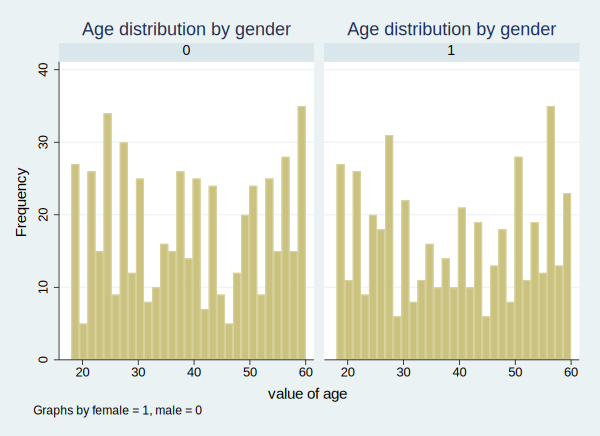

In [25]:
// generate histogram of age 
histogram age , frequency by(gender) title("Age distribution by gender")

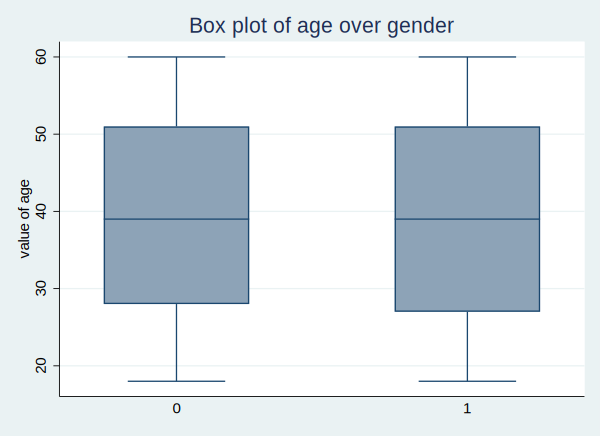

In [26]:
graph box age, over(gender) title("Box plot of age over gender")

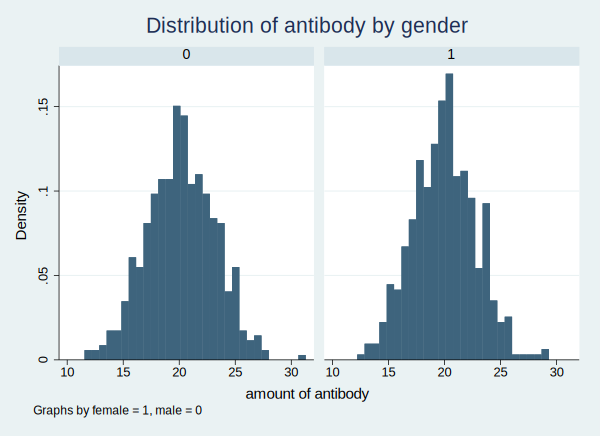

In [27]:
// you can also put histogram togehter 
histogram antibody, by(gender, title("Distribution of antibody by gender")) ///
        color(edkblue) 

When you want to do some data visualization, please read the following
figure first and think about _what do you want to show_. 

![datavisualization](http://i2.wp.com/insightextractor.com/wp-content/uploads/2012/08/chart-chooser-data-visualization.png)

### Generate residence area for our sample

When recruit participats, it is better to have people from different places.
In our simulation, we decided that we will recruite across multiple study sites 
in _Oxford, Southampton, and London_. In Stata, we will again use numeric values
to represent those three places:

* 1 - Oxford
* 2 - Southampton
* 3 - London

We also assume that the chace of having a person from those three places should be
around $1/3$. 

In [28]:
// generate places with uniform distribution generator 
generate places = 1 if runiform() <= 0.3333

(682 missing values generated)


In [29]:
// replace those missing values with uniform distribution generator again
replace places = 2 if runiform() > 0.3333 & runiform() <= 0.6666 & missing(places)

(302 real changes made)


In [30]:
// we still have missing values
count if places == .

  380


In [31]:
// replace those missing values 
replace places = 3 if missing(places)

(380 real changes made)


In [32]:
// table to get the frequency for each category
table places


----------------------
   places |      Freq.
----------+-----------
        1 |        318
        2 |        302
        3 |        380
----------------------


In [33]:
// label the variable 
label variable places "1:Oxford, 2:Southampton, 3:London"

In [34]:
describe


Contains data
  obs:         1,000                          
 vars:             4                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 amount of antibody
age             float   %9.0g                 value of age
gender          float   %9.0g                 female = 1, male = 0
places          float   %9.0g                 1:Oxford, 2:Southampton, 3:London
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


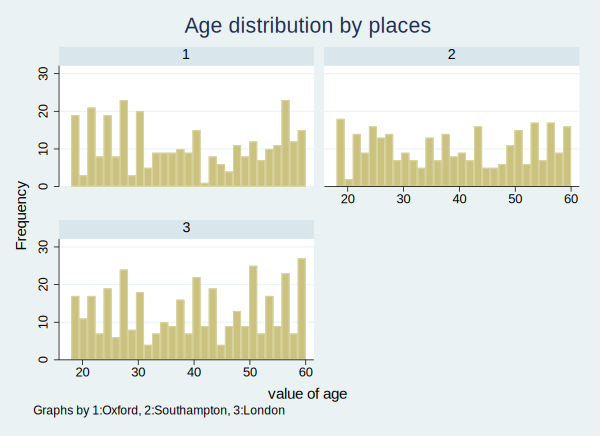

In [35]:
// plot the histogram of age by places 
histogram age, frequency by(places, title("Age distribution by places"))

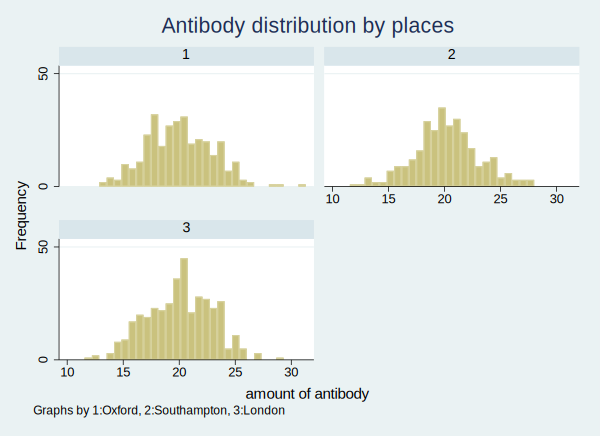

In [36]:
// plot the antiboy histogram by places 
histogram antibody, frequency by(places, title("Antibody distribution by places"))

## Clinical trials 

Medicial researchers have already developed a vaccine called `ChAd1-nCoV` that
is made from a virus (a weakened version). By vaccinating with `ChAd1-nCoV`, 
we are hoping to make the body recognise and develop an immune response to 
the Spike protein that will help stop the SARS-CoV-2 virus from entering human 
cells and therefore prevent infection.

The participants in our sample will be randomly allocated to receive either 
the `ChAd1-nCoV` vaccine or a licensed vaccine (`MenACWY`) that will be 
used as a ‘control’ for comparison. The `MenACWY` vaccine is a licensed vaccine
and it has been given routinely to teenagers in the UK since 2015 and protects 
against one of the most common causes of meningitis and [sepsis](https://www.cdc.gov/sepsis/what-is-sepsis.html#:~:text=Sepsis%20is%20the%20body%27s%20extreme,%2C%20skin%2C%20or%20gastrointestinal%20tract.). 
This vaccine is also given as a travel vaccine for high risk countries.

Please watch the following video to understand how clinical trials are conducted. 

<iframe width="618" height="315" src="https://www.youtube.com/embed/6cVkvCdxrWk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Randomly allocate vaccine

Now, we will allocate vaccine randomly. One group will be called __treatment group__
 or (experimental group), the other group will be called __control group__. We
 will generate a new variable `treatment`:

 * `treatment` = 1 if the participat was allocated to receive `ChAd1-nCoV`
 * `treatment` = 0 if the participat was allocated to receive  `MenACWY`

In [37]:
// generate treatment variable with uniform distribution generator
generate treatment = 1 if runiform() >= 0.5
replace treatment = 0 if missing(treatment)
table treatment


(503 missing values generated)

(503 real changes made)


----------------------
treatment |      Freq.
----------+-----------
        0 |        503
        1 |        497
----------------------


In [38]:
label variable treatment "1=receive Cov19 Vaccine, 0=receive placebo vaccine"
describe




Contains data
  obs:         1,000                          
 vars:             5                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 amount of antibody
age             float   %9.0g                 value of age
gender          float   %9.0g                 female = 1, male = 0
places          float   %9.0g                 1:Oxford, 2:Southampton, 3:London
treatment       float   %9.0g                 1=receive Cov19 Vaccine, 0=receive
                                                placebo vaccine
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [39]:
// now let's list our dataset to have a look 
list in f/10


     +---------------------------------------------+
     | antibody   age   gender   places   treatm~t |
     |---------------------------------------------|
  1. | 18.25307    58        0        1          1 |
  2. | 16.46375    43        0        2          1 |
  3. | 22.61064    49        1        3          1 |
  4. | 16.88403    40        1        2          1 |
  5. | 20.63522    24        0        1          0 |
     |---------------------------------------------|
  6. | 20.68504    43        1        3          1 |
  7. | 22.81262    19        0        1          1 |
  8. | 21.36884    53        0        1          0 |
  9. |  18.1802    59        0        2          0 |
 10. | 17.53478    56        1        3          0 |
     +---------------------------------------------+


### Check the covariate balance between treatment and control groups

Before we assign the vaccine to our participants, we need to check the 
_covariate balance_ between treatment and control groups, meaning that the 
_covariate varialbes_ (such as age, gender, and places) should bear the
similar features for __treatment group__ and __control group__. In other words,
treatment group and control group should look similar in terms of their characteristics. 
For instance, both treatment group and control group should have _mixed genders_. 

What we want to check is whether our sample is as balanced as the descriptions
in the following table. 

|          |                    Treatment                    |                     Control                     | Balanced |
|----------|:-----------------------------------------------:|:-----------------------------------------------:|----------|
| antibody | normally distributed                            | normally distributed                            | Yes      |
| age      |        uniform distributed from age 18-60       |        uniform distributed from age 18-60       | Yes      |
| gender   |           mixed (50% female, 50% male)          |           mixed (50% female, 50% male)          | Yes      |
| places   | mixed (1/3 Oxford, 1/3 Southampton, 1/3 London) | mixed (1/3 Oxford, 1/3 Southampton, 1/3 London) | Yes      |

In [51]:
// check antibody balance
tabulate treatment, summarize(antibody)


  1=receive |
      Cov19 |
   Vaccine, |
  0=receive |
    placebo |    Summary of amount of antibody
    vaccine |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   20.050491   3.0118432         503
          1 |   20.125169   2.8343049         497
------------+------------------------------------
      Total |   20.087606   2.9237294       1,000


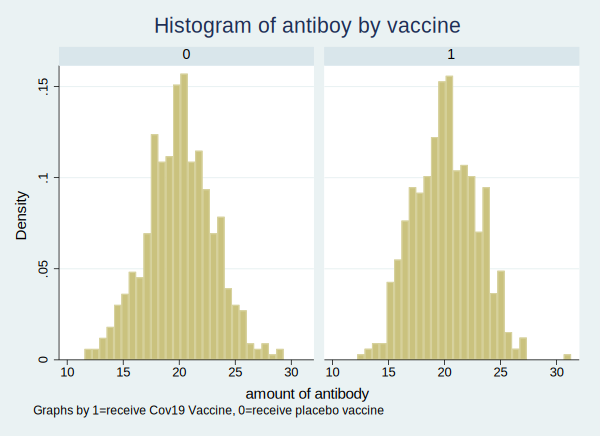

In [41]:
// check balance of antibody with figure
histogram antibody, by(treatment, title("Histogram of antiboy by vaccine"))

We can see from the statistics and figure, the treatment group and control
group are quite matched in terms of distribution of antibody. How about 
other factors?

In [52]:
// check balance for age
tabulate treatment, summarize(age)


  1=receive |
      Cov19 |
   Vaccine, |
  0=receive |
    placebo |       Summary of value of age
    vaccine |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   39.524851   12.888847         503
          1 |   38.808853   13.186843         497
------------+------------------------------------
      Total |      39.169   13.036195       1,000


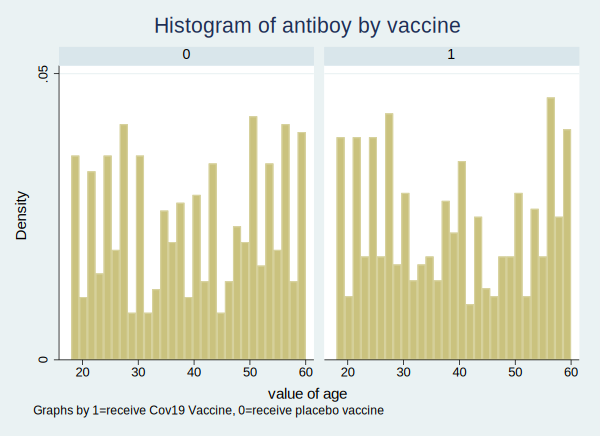

In [43]:
// check balance of age with figure
histogram age, by(treatment, title("Histogram of antiboy by vaccine"))

In [44]:
// check the balance of places with tablue 
tabulate places treatment


 1:Oxford, |    1=receive Cov19
2:Southamp |  Vaccine, 0=receive
      ton, |    placebo vaccine
  3:London |         0          1 |     Total
-----------+----------------------+----------
         1 |       160        158 |       318 
         2 |       142        160 |       302 
         3 |       201        179 |       380 
-----------+----------------------+----------
     Total |       503        497 |     1,000 


After checking the balance for all variables, we could say that the treatment
group and control group are very similar. 

### Generate effects 

Now, we have two groups: treatment group and control group. We will generate
results for our vaccine. We will simulate two scenarios:

* for people who received vaccine `ChAd1-nCoV`, their antibody will increase around
$10\%$ 
* for people who received placebo `MenACWY`, their antibody will only increase 
around $1\%$. 

Since different people might have different reactions once receiving the vaccine,
we will also generate some _noise_ which assumes to follow the normal
distribution $N(0, 1)$. 

In [45]:
// generate the effects 
generate effect = antibody * 1.1  + rnormal(0, 1) if treatment == 1
replace effect = antibody * 1.01 + rnormal(0, 1) if missing(effect)


(503 missing values generated)

(503 real changes made)


In [46]:
// label the variable
label variable effect "The effects of vaccine"

In [47]:
describe 


Contains data
  obs:         1,000                          
 vars:             6                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
antibody        float   %9.0g                 amount of antibody
age             float   %9.0g                 value of age
gender          float   %9.0g                 female = 1, male = 0
places          float   %9.0g                 1:Oxford, 2:Southampton, 3:London
treatment       float   %9.0g                 1=receive Cov19 Vaccine, 0=receive
                                                placebo vaccine
effect          float   %9.0g                 The effects of vaccine
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


In [48]:
list in f/10


     +--------------------------------------------------------+
     | antibody   age   gender   places   treatm~t     effect |
     |--------------------------------------------------------|
  1. | 18.25307    58        0        1          1   18.11259 |
  2. | 16.46375    43        0        2          1   18.75213 |
  3. | 22.61064    49        1        3          1   25.38285 |
  4. | 16.88403    40        1        2          1   19.24692 |
  5. | 20.63522    24        0        1          0   21.45242 |
     |--------------------------------------------------------|
  6. | 20.68504    43        1        3          1    25.4498 |
  7. | 22.81262    19        0        1          1   25.49699 |
  8. | 21.36884    53        0        1          0   21.28258 |
  9. |  18.1802    59        0        2          0   17.76526 |
 10. | 17.53478    56        1        3          0   17.28904 |
     +--------------------------------------------------------+


## Test the results 

Now, we will test whether the vaccine `ChAd1-nCoV` works or not. To do this, we
will form the following hypothesis:

* Null hypothesis $H_0$: there is no difference of effects between treatment group
and control group $\mu_{treatment} = \mu_{control}$
* Alternative hypothesis $H_1$: people who received `ChAd1-nCoV` have higher
amount of antibody than those who do not $\mu_{treatment} > \mu_{control}$

If you have forgotten the _t-test_, please review via the following figure.

![t-test](https://datatab.net/assets/tutorial/one_Sample_t-Test.png)

In [49]:
// run t test
ttest effect, by(treatment)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
       0 |     503    20.24671    .1403863    3.148537    19.97089    20.52252
       1 |     497    22.16284     .146572    3.267601    21.87486    22.45082
---------+--------------------------------------------------------------------
combined |   1,000    21.19902    .1058368    3.346853    20.99134    21.40671
---------+--------------------------------------------------------------------
    diff |           -1.916131     .202912               -2.314314   -1.517947
------------------------------------------------------------------------------
    diff = mean(0) - mean(1)                                      t =  -9.4432
Ho: diff = 0                                     degrees of freedom =      998

    Ha: dif

The _t-test_ shows that the we could reject the null hypothesis and accept 
the alternative one at $1\%$ significant level. Here, the comparison of the two 
means is deemed _statistically significant if, according to a threshold probability -the
significance level - the data would be unlikely to occur if the null hypothesis
were true_. 

We could also compare effects of two group visually. 

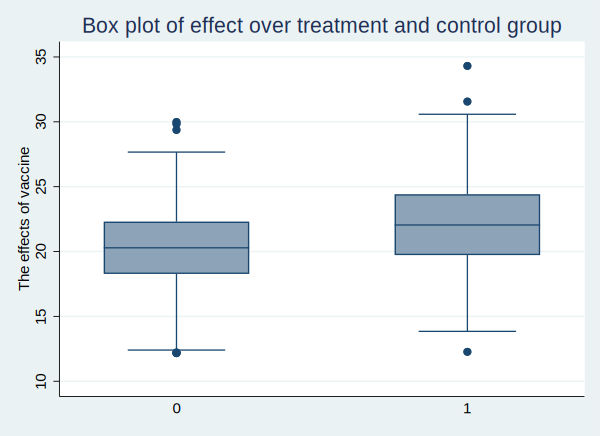

In [50]:
graph box effect, over(treatment) title("Box plot of effect over treatment and control group")

<div class="admonition question">
<p class="admonition-title">
Questions
<p>
<ul>
  <li>Do you think our vaccine works or not? </li>
  <li>Why do we need a balanced sample?</li>
  <li>What is the difference of effect between treatment and control group?</li>
</ul>
</div>

## References

1. [Stata Random Number Generator](https://blog.stata.com/2012/07/18/using-statas-random-number-generators-part-1/)

<script>
    var div_svg = document.getElementsByClassName('jp-RenderedHTML')

    for (const element of div_svg) {
        var svg_str = element.childNodes[1].srcdoc 
        element.childNodes[1].srcdoc =  svg_str.replace(/width="600px"/i, "width=100%")
    }
</script>